# **About Dataset**
You are working in a data consulting company. Your client want you to build a spam detector so that employees get only relevant messages/email and it filters out all irrelevant/spam messages
Your IT Team has already scraped all the messages in an excel file for you
The files contain one message per line.
Each line is composed of different message
You need to develop a spam detector so that whenever a new message hits inbox. The model should be able to guage whether it is a spam or an ham message.

# **Step 1: Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


* pandas: For data handling.
* matplotlib: For visualizations.
* wordcloud: To visualize word frequencies.
* scikit-learn: For text vectorization, splitting data, model training, and evaluation.

# **Step 2: Load and Clean the Dataset**

In [3]:
# Load the dataset and handle missing values.

# Load the dataset
data = pd.read_csv('/content/emails_V2.csv.zip')

# Drop rows with missing values
data = data.dropna(subset=['text', 'spam'])

# Check the first few rows
data.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


### Purpose: Remove rows where the text or spam column is empty.

# **Step 3: Check and Visualize Class Distribution**
Understand how many emails are spam and ham (non-spam).

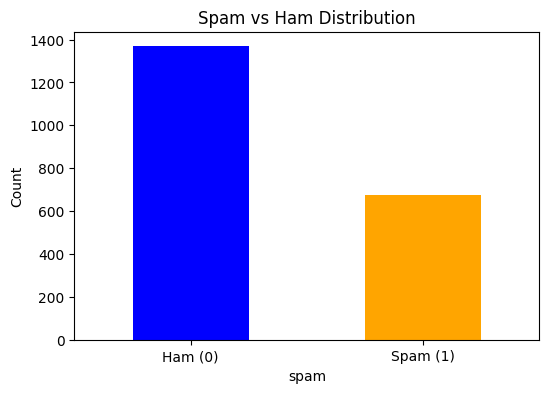

In [4]:
# Check class distribution
class_counts = data['spam'].value_counts()

# Visualize class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Spam vs Ham Distribution')
plt.xticks(ticks=[0, 1], labels=['Ham (0)', 'Spam (1)'], rotation=0)
plt.ylabel('Count')
plt.show()


A bar chart showing the count of spam (1) and ham (0) emails.

# **Step 4: Visualize Word Frequencies**
Generate WordClouds to visualize the most common words in spam and ham emails.

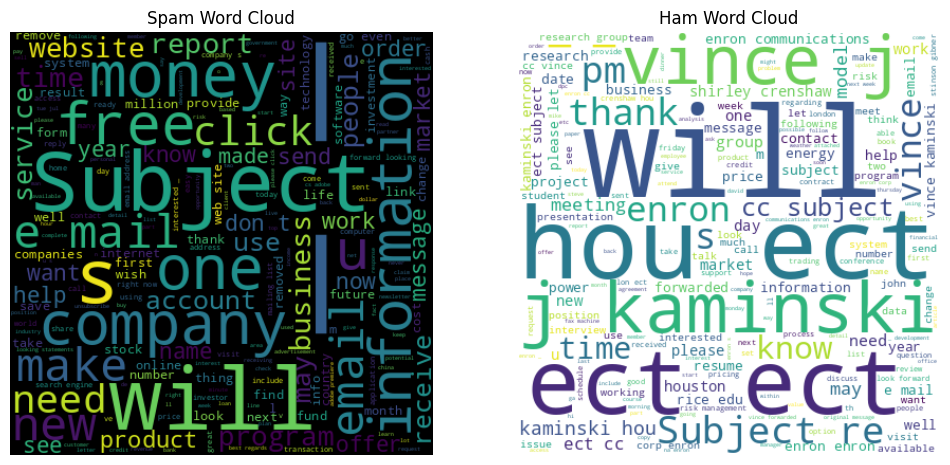

In [9]:
# Combine text for spam and ham emails
spam_words = ' '.join(data[data['spam'] == 1]['text'])
ham_words = ' '.join(data[data['spam'] == 0]['text'])

# Generate WordCloud for spam
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_spam = WordCloud(width=400, height=400, background_color='black').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

# Generate WordCloud for ham
plt.subplot(1, 2, 2)
wordcloud_ham = WordCloud(width=400, height=400, background_color='white').generate(ham_words)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()


Two WordClouds showing frequent words in spam and ham emails.

# **Step 5: Split the Dataset**
Split the dataset into training and testing sets.

In [10]:
# Define features and labels
X = data['text']
y = data['spam']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Use 70% data for training and 30% data for testing.

# **Step 6: Preprocess Text Using TF-IDF**
Convert the email text into numerical features using TF-IDF.

In [11]:
# Convert text data to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


 Gives higher importance to unique words and reduces the weight of common words.

# **Step 7: Train the Naive Bayes Model**
Train a Multinomial Naive Bayes classifier, which is effective for text classification.

In [12]:
# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

# **Step 8: Evaluate the Model**
Evaluate the model’s performance using the test set.

In [13]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Display evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       203
         1.0       0.98      0.99      0.99       410

    accuracy                           0.98       613
   macro avg       0.98      0.98      0.98       613
weighted avg       0.98      0.98      0.98       613

Accuracy Score: 0.9820554649265906


* Accuracy: Overall correctness of the model.

* Precision: Proportion of predicted spam emails that are correct.

* Recall: Proportion of actual spam emails identified by the model.

* F1-Score: Balance between precision and recall.


# **Step 9: Visualize Confusion Matrix**
Visualize the confusion matrix to analyze the classification performance.

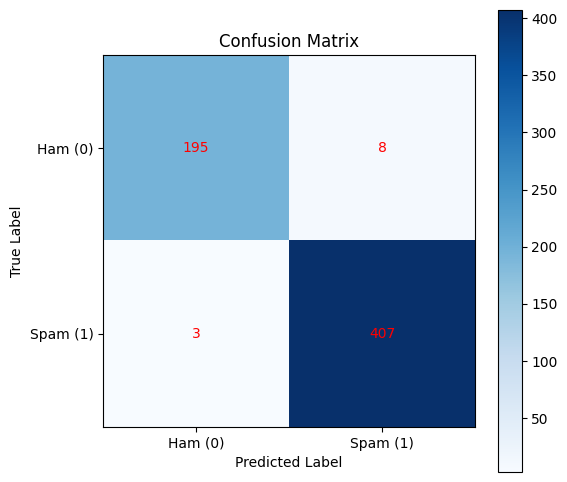

In [14]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(ticks=[0, 1], labels=['Ham (0)', 'Spam (1)'])
plt.yticks(ticks=[0, 1], labels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Annotate matrix with counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()


* True Positives (TP): Correctly predicted spam.
* True Negatives (TN): Correctly predicted ham.
* False Positives (FP): Ham misclassified as spam.
* False Negatives (FN): Spam misclassified as ham.

# **Conclusion**
The spam classification analysis using the Multinomial Naive Bayes model demonstrated high accuracy (~98%) in distinguishing spam and ham emails. The dataset's balanced distribution allowed fair training and testing, while text analysis via WordClouds revealed frequent spam-related words like free and offer compared to generic terms in ham emails. Evaluation metrics, including precision and recall, highlighted the model's reliability, with the confusion matrix confirming low misclassification rates for both spam and ham. This robust pipeline is well-suited for real-world email filtering applications, offering an effective solution for spam detection.